In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {
    "Round of 64":[220, 230, 230, 230, 230, 220], 
    "Round of 32":[160, 140, 120, 180, 120, 140], 
    "Round of 16":[80,  80 , 80 , 160, 80 , 160], 
    "Elite 8":    [160, 160, 160, 240, 160, 160], 
    "Final 4":    [160, 160, 160, 320, 160, 320], 
    "Final":      [0  , 0  , 0  , 0  , 0  , 0  ],
    "Percentile": [63 , 61 , 58 , 94 , 58 , 87]
}
rows = [
    "SVM-NoSeed", 
    "SVM", 
    "LDA", 
    "Neural Network", 
    "Neural Network - No Seed",
    "High Seed"
]

df = pd.DataFrame(data, index=rows)

df["Total"] = df.iloc[:, :6].sum(1)

## Overall Data

In [4]:
df.sort_values(["Total"], ascending = False)

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final,Percentile,Total
Neural Network,230,180,160,240,320,0,94,1130
High Seed,220,140,160,160,320,0,87,1000
SVM-NoSeed,220,160,80,160,160,0,63,780
SVM,230,140,80,160,160,0,61,770
LDA,230,120,80,160,160,0,58,750
Neural Network - No Seed,230,120,80,160,160,0,58,750


## Round Accuracy

Note that this is not exactly the accuracy for later rounds since errors propagate. Thus even if an error was made in a previous round, the model can still get points in later rounds, so while the matchup it originally made the prediction based off was invalid, it was still "correct" in a sense.

In [5]:
accuracy = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]] * 100 / 320
accuracy

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final
SVM-NoSeed,68.750,50.00,25.0,50.0,50.0,0.0
SVM,71.875,43.75,25.0,50.0,50.0,0.0
LDA,71.875,37.50,25.0,50.0,50.0,0.0
Neural Network,71.875,56.25,50.0,75.0,100.0,0.0
Neural Network - No Seed,71.875,37.50,25.0,50.0,50.0,0.0
High Seed,68.750,43.75,50.0,50.0,100.0,0.0


## Cumulative Scores

<AxesSubplot:title={'center':'2021 Cumulative Scores Per Round'}, xlabel='Round'>

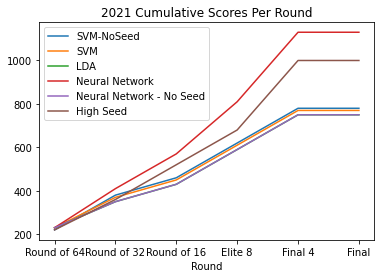

In [7]:
cumulative = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]].cumsum(1)
cumulative = cumulative.transpose()
cumulative.index.name = "Round"
cumulative.plot(title="2021 Cumulative Scores Per Round")